# **1. Overview**

**The Challenge**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

The data has been split into two groups:

  1. training set (train.csv)
  2. test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

**Variable Notes**


**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

**Sibling** = brother, sister, stepbrother, stepsister

**Spouse** = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...

**Parent** = mother, father

**Child** = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

**NOTE:** Use google colab IDE to run this notebook

# **2. Import Libraries:**

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **3. Load Dataset:**

In [2]:
# upload the train dataset
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [3]:
import io
titanic_df=pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **4.Exploratory Data Analysis:**

In [5]:
# shape of dataset
titanic_df.shape

(891, 12)

In [6]:
# statistical analysis of train data
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# check for null values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# fill null values of 'Age' column be median of that column
titanic_df['Age']=titanic_df['Age'].fillna(titanic_df['Age'].median())
# fill null values of 'Embarked' column be mode of that column
titanic_df['Embarked']=titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [11]:
# drop unnecessary columns
titanic_df.drop(columns=["Cabin","Name","Ticket","PassengerId"],axis=1,inplace=True )

In [12]:
# create a new column by adding 'Parch' & 'SibSp' columns
titanic_df["Family_Member"]=titanic_df['Parch']+titanic_df['SibSp']

In [13]:
# drop 'SibSp' & 'Parch' columns
titanic_df.drop(columns=["SibSp","Parch"],axis=1,inplace=True )

In [14]:
# check for null values
titanic_df.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age              0
Fare             0
Embarked         0
Family_Member    0
dtype: int64

In [15]:
# separate columns having categorical values
object_df=titanic_df.select_dtypes(include=['object']).copy()
object_df.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [16]:
object_df.nunique()

Sex         2
Embarked    3
dtype: int64

In [17]:
# unique values in object_df dataframe
print("Sex :",object_df.Sex.unique())
print("Embarked :",object_df.Embarked.unique())

Sex : ['male' 'female']
Embarked : ['S' 'C' 'Q']


# **5.Data Visualization:**

In [18]:
# visualize frequency distribution using barplot
def plot_bar_graph(column_name):
    ed_count = column_name.value_counts()
    sns.set(style="darkgrid")
    sns.barplot(ed_count.index, ed_count.values, alpha=0.9)
    plt.title('Frequency Distribution of {} Levels using Bar Plot'.format(column_name.name))
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('{}'.format(column_name.name), fontsize=12)
    plt.show() 
    

In [19]:
# visualize frequency distribution using pie chart
def plot_pie_graph(column_name):
    labels = column_name.astype('category').cat.categories.tolist()
    counts = column_name.value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
    ax1.axis('equal')
    plt.title('Frequency Distribution of {} Levels using Pie Chart'.format(column_name.name))
    plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


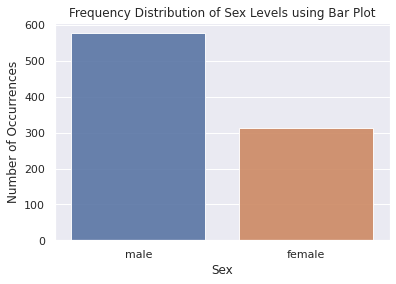

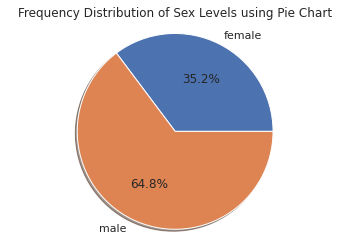

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


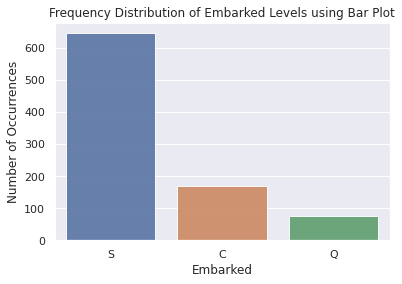

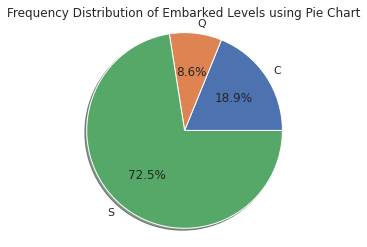

In [20]:
for col in object_df.columns:
    plot_bar_graph(object_df[col])
    plot_pie_graph(object_df[col])

In [21]:
# separate columns having numeric values
int_df=titanic_df.select_dtypes(include=['integer']).copy()
int_df.drop(axis=1,columns=['Survived'],inplace=True)
int_df.head()

,Pclass,Family_Member
0,3,1
1,1,1
2,3,0
3,1,1
4,3,0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


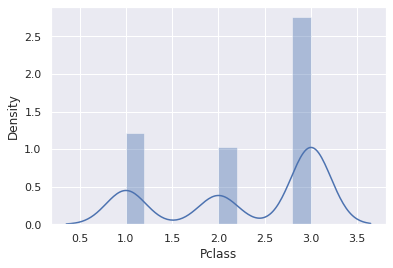

In [22]:
# distribution of 'Pclass' column
sns.distplot(int_df['Pclass'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


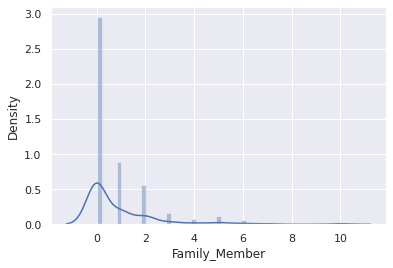

In [23]:
# distribution of 'Family_Member' column
sns.distplot(int_df['Family_Member'])

# **6.Data Preprocessing**

In [24]:
# encode the categorical values into numeric values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in object_df.columns:
    titanic_df[col]=le.fit_transform(titanic_df[col])

In [25]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_Member
0,0,3,1,22.0,7.2500,2,1
1,1,1,0,38.0,71.2833,0,1
2,1,3,0,26.0,7.9250,2,0
3,1,1,0,35.0,53.1000,2,1
4,0,3,1,35.0,8.0500,2,0


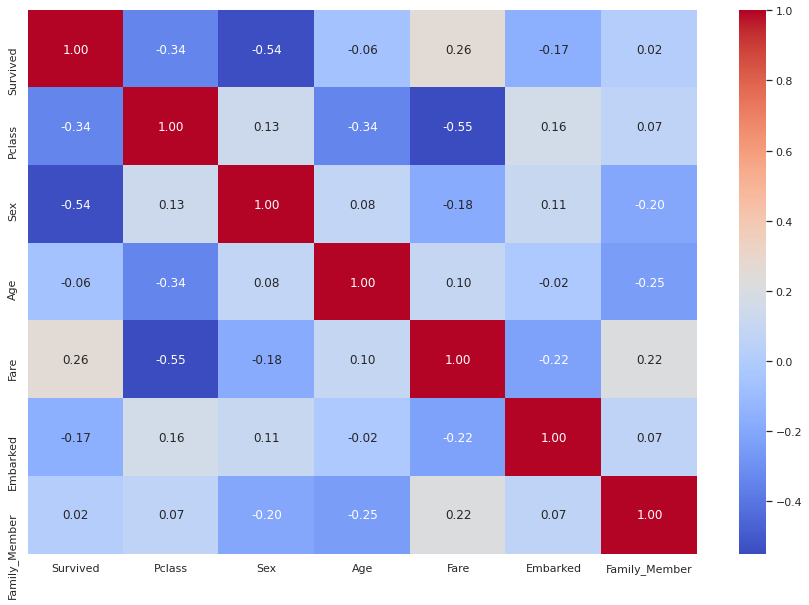

In [26]:
# co-relation of columns with eachother
plt.figure(figsize=(15,10))
corr=titanic_df.corr()
sns.heatmap(corr,annot=True,fmt="0.2f",cmap="coolwarm")

In [27]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_Member
0,0,3,1,22.0,7.2500,2,1
1,1,1,0,38.0,71.2833,0,1
2,1,3,0,26.0,7.9250,2,0
3,1,1,0,35.0,53.1000,2,1
4,0,3,1,35.0,8.0500,2,0


In [28]:
# separate features & target variables
x=titanic_df.drop(axis=1,columns=['Survived'])
y=titanic_df['Survived']

# **8. Hyper Parameter tuning**

In [29]:
# import classification libraries
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [30]:
# this code is to show how much time required to train the model using different algorithms
from datetime import datetime
def timer(start_time= None):
  if not start_time:
    start_time=datetime.now()
    return start_time
  elif start_time:
    thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
    tmin,tsec=divmod(temp_sec,60)
    print('\n Time taken: %i hours %i minutes and %s seconds. '% (thour,tmin,round(tsec,2)))

In [31]:
# parameters of all classification algorithms respectively
model_param={
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    },
    
    'decission_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion' : ["gini", "entropy"]
        }
    },
    'svm':{
        'model':SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'xgboost':{
        'model':xgb.XGBClassifier(),
        'params':{
        'learning_rate':[0.20,0.30,0.35,0.37,0.40],
        'max_depth':[6,7,8,9,10],
        'min_child_weight':[5,7,8,9],
        'gamma':[0.0,0.1,0.2,0.3],
        'colsample_bytree':[0.5,0.7,0.8,0.9,1.0]
        }
    }
    
}

In [32]:
start_time=timer(None)
scores=[]
for model_name,mp in model_param.items():
    # Apply GridSearchCV
    rs=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    rs.fit(x,y)
    scores.append({
        'model':model_name, # it'll retrive the best model name
        "best_score":rs.best_score_, # it'll retrive the best accuracy score
        'best_params':rs.best_params_ # it'll retrive the best parameter
    })
timer(start_time)


 Time taken: 0 hours 11 minutes and 54.12 seconds. 


In [33]:
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.802536,{'n_estimators': 10}
1,logistic_regression,0.791262,{'C': 5}
2,decission_tree,0.778940,{'criterion': 'gini'}
3,svm,0.787860,"{'C': 1, 'kernel': 'linear'}"
4,xgboost,0.849627,"{'colsample_bytree': 0.7, 'gamma': 0.2, 'learn..."


In [34]:
rs.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.2,
 'learning_rate': 0.37,
 'max_depth': 7,
 'min_child_weight': 7}

In [35]:
rs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.37, max_delta_step=0, max_depth=7,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# **9.Model Building**



In [36]:
# Apply KFold
from sklearn.model_selection import KFold
skf=KFold(n_splits=8)
xg3= xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.37, max_delta_step=0, max_depth=7,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
for train_index,test_index in skf.split(x,y):
    x_train,x_test,y_train,y_test=x.loc[train_index],x.loc[test_index],y[train_index],y[test_index]
    xg3.fit(x_train, y_train)
xg3.score(x_train, y_train)

0.9038461538461539

In [37]:
#Saving Scikitlearn models
import joblib
joblib.dump(xg3, "xgboost_titanic.pkl")


['xgboost_titanic.pkl']